In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
augmented_data = pd.read_csv('subject_data.csv')
original_data = augmented_data[augmented_data['Subject'].apply(lambda x: x.isdigit())]

In [9]:
original_data

,Subject,Trial,Path,Heart Rate,Respiratory Rate
0,2,1,frames/2/1,100.0,20.0
1,2,2,frames/2/2,128.0,26.0
2,4,1,frames/4/1,56.0,10.0
3,4,2,frames/4/2,72.0,18.0
4,6,1,frames/6/1,78.0,10.0
5,6,2,frames/6/2,94.0,20.0
6,8,2,frames/8/2,84.0,12.0
7,12,1,frames/12/1,74.0,10.0
8,12,2,frames/12/2,102.0,18.0
9,13,1,frames/13/1,80.0,12.0


In [20]:
def get_heartrate_distrib(df):
    heart_rates = list(df['Heart Rate'])
    hr_unique = sorted(list(set(heart_rates)))
    
    hr_count = {hr:0 for hr in hr_unique}
    
    for hr in heart_rates:
        hr_count[hr] += 1
    
    return hr_unique, [hr_count[hr] for hr in hr_unique]
    

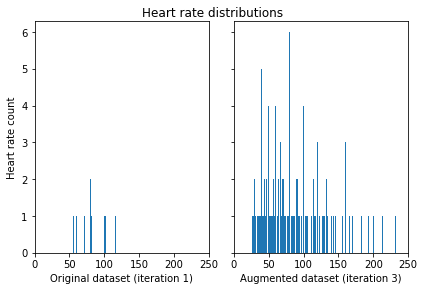

In [57]:
fig, axarr = plt.subplots(1, 2, figsize=(6, 4), sharey=True)
unique_aug, counts_aug = get_heartrate_distrib(augmented_data)
orig, counts_orig = get_heartrate_distrib(original_data)
plt.suptitle("Heart rate distributions", y=1)

axarr[1].bar(unique_aug, counts_aug)
axarr[1].set_xlim(0, 250)
axarr[0].set_ylabel("Heart rate count")
axarr[0].set_xlabel("Original dataset (iteration 1)")
axarr[1].set_xlabel("Augmented dataset (iteration 3)")
axarr[0].bar(orig, counts_orig)
axarr[0].set_xlim(0, 250)
plt.tight_layout()
plt.savefig("report/figs/dataset_distrib.png")
plt.show()

In [65]:
p1 = "training.log"
df = pd.read_csv(p1)

In [66]:
df

,epoch,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0,14290.686250,14290.686250,9718.809193,9718.809193
1,1,12534.257298,12534.257298,8314.916249,8314.916249
2,2,10472.325771,10472.325771,6287.692965,6287.692965
3,3,8737.010879,8737.010879,3501.688657,3501.688657
4,4,4271.584478,4271.584478,2110.639638,2110.639638
5,5,2883.924490,2883.924490,1872.042275,1872.042275
6,6,2722.431763,2722.431763,1909.186109,1909.186109
7,7,2390.679556,2390.679556,1965.834330,1965.834330
8,8,2697.754958,2697.754958,2071.686640,2071.686640
9,9,2367.991910,2367.991910,2061.047753,2061.047753


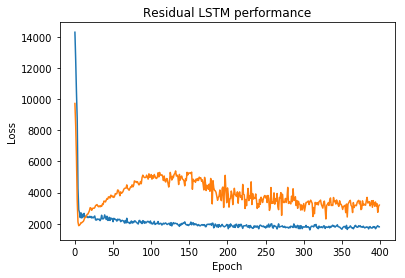

In [70]:
loss = list(df['loss'])
val_loss = list(df['val_loss'])

plt.plot(loss, label='Loss')
plt.plot(val_loss, label="Validation loss")
plt.title("Residual LSTM performance")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("reslstm.png")
plt.show()